In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs #changed on to import the library
from sklearn.preprocessing import StandardScaler
from pylab import *
import matplotlib.pyplot as plt

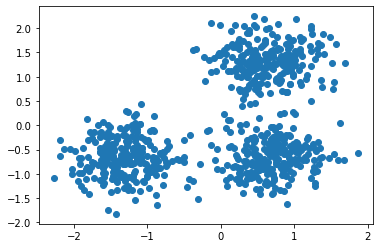

In [3]:
#lets generate the sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
# Scale and standardize the dataset
X = StandardScaler().fit_transform(X)
xx, yy = zip(*X)
plt.scatter(xx,yy)
plt.show()

In [5]:
# Set up DBSCAN parameters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
print(labels)
core_samples = db.core_sample_indices_
print(core_samples)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2  0  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  2  2  2  0  2  0  2  2  0  2  2  2  0  0
  1  1  1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1  2  2  1  0  0  1  1  1  0  1  0  2  0  2  2  2  2  2  1
  1  0  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2  2  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  2

In [6]:
# if the label equals “-1”, this means the data record is an outlier.
# find the outliers
outliers = X[labels == -1]
outliers

array([[-1.4302079 , -1.82380068],
       [-0.13447918,  2.11039748],
       [ 1.22425496,  0.50161091],
       [ 1.53624088,  0.89460489],
       [ 1.68745105,  1.27830756],
       [-1.53199232, -1.74146844],
       [-0.42227599, -0.19034456],
       [ 1.52307352,  0.74115752],
       [-0.46307453, -1.26531795],
       [ 1.62198217,  0.05020132],
       [ 1.01170962,  0.24102378],
       [-0.43185167, -1.10093485],
       [-0.3164503 , -1.51218921],
       [-2.19229513, -0.30228576],
       [ 0.9807011 ,  0.27373202],
       [-0.86338803, -1.63431796],
       [ 1.87043803, -0.56476419],
       [-0.37447929, -1.13624183]])

In [7]:
#lets get the cluster datasets
cluster1 = X[labels == 0]
cluster2 = X[labels == 1]
cluster3 = X[labels == 2]
print(cluster1)
print(cluster2)
print(cluster3)

[[ 0.49426097  1.45106697]
 [ 0.33855918  1.03875871]
 [ 1.1224246   1.77493654]
 [ 1.08247212  0.8868554 ]
 [ 1.01416668  1.34114022]
 [ 0.20258715  1.61104849]
 [ 0.88491334  1.66591701]
 [ 0.2495873   1.57229126]
 [ 0.47827546  1.19798226]
 [ 0.52813962  1.32892751]
 [ 0.7563167   0.92063364]
 [ 0.49282409  1.78274422]
 [ 0.38051095  1.24884772]
 [ 0.5419699   1.03090708]
 [ 0.45626317  2.05788224]
 [ 1.36805202  1.65962813]
 [ 0.98141038  1.01828534]
 [ 0.15853059  1.68427935]
 [ 0.49893333  1.18944226]
 [ 0.39439246  1.10697669]
 [ 0.36316812  1.90748257]
 [ 0.34656878  1.26411863]
 [ 0.23551504  1.71737552]
 [ 0.46750573  0.45045933]
 [ 0.01988339  1.48714817]
 [ 0.18999226  1.10986299]
 [ 1.48201718  1.82713556]
 [ 0.40314456  1.57028295]
 [ 0.97262049  1.21000471]
 [ 0.40253135  1.15248839]
 [ 0.09067435  1.61848052]
 [ 0.63196933  1.19544068]
 [ 0.51199778  0.67807869]
 [ 0.52911846  0.65491484]
 [ 0.46828379  0.75573359]
 [ 0.60561724  1.70403705]
 [ 0.76317614  1.82318913]
 

{0, 1, 2, -1}


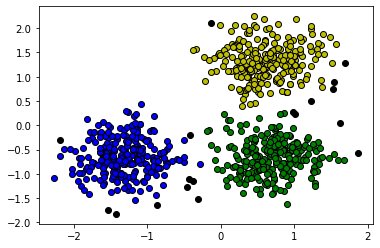

In [8]:
# Plot the results with a specific color for each cluster, and a black color for the noise points
unique_labels = set(labels)
print(unique_labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
 if k == -1:
   col = 'k'
 
 class_member_mask = (labels == k)
 
 xy = X[class_member_mask & core_samples_mask]
 plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k',
                  markersize=6)
 
 xy = X[class_member_mask & ~core_samples_mask]
 plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k',
                  markersize=6)